# 非監督式學習 Un-Supervised Learning

分群演算法: K-means 分群分類演算法

非監督式學習根據物以類聚的方式把資料樣本分成K群。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
df = pd.DataFrame(
    data=np.c_[iris["data"], iris["target"]],
    columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [3]:
X = df.drop(labels=["Species"], axis=1).values
y = df["Species"]

In [4]:
from sklearn.cluster import KMeans

kmeansModel = KMeans(n_clusters=3, random_state=40)
# fit predict
cluster_pred = kmeansModel.fit_predict(X)

c:\Users\Dan\anaconda3\envs\test01\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [5]:
# 每個點到其他cluster質心的距離的合
kmeansModel.inertia_

78.8556658259773

In [6]:
# 查看各個cluster的中心位置
kmeansModel.cluster_centers_

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

**真實分類**

使用Iris dataset繪圖

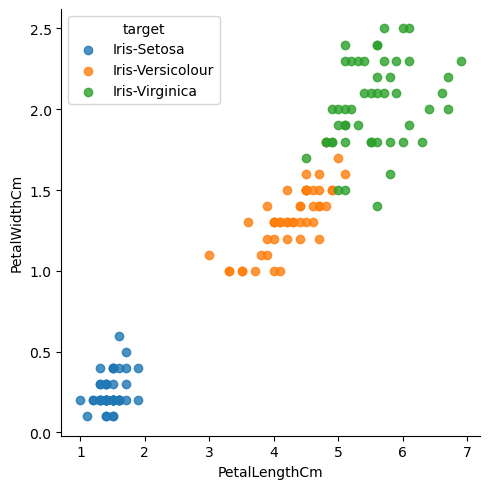

In [7]:
# 繪圖
sns.lmplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species", data=df, fit_reg=False, legend=False)
plt.legend(title="target", loc="upper left", labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])

K-means後預測結果

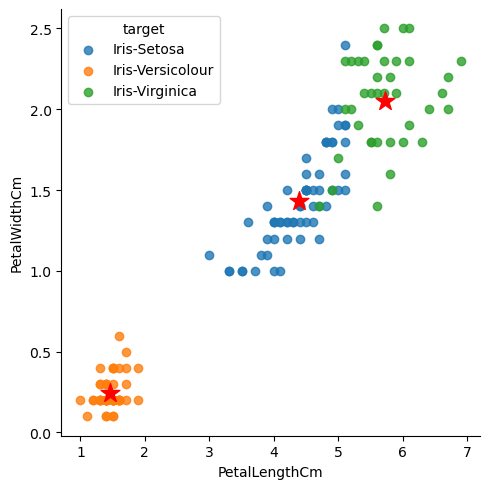

In [8]:
df["Predict"] = cluster_pred
sns.lmplot(x="PetalLengthCm", y="PetalWidthCm", data=df, hue="Predict", fit_reg=False, legend=False)
plt.scatter(kmeansModel.cluster_centers_[:, 2], kmeansModel.cluster_centers_[:, 3], s=200, c='r', marker='*')
plt.legend(title="target", loc="upper left", labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])

使用inertia做評估

In [9]:
kmeans_list = [KMeans(n_clusters=k, random_state=40).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_list]

c:\Users\Dan\anaconda3\envs\test01\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Dan\anaconda3\envs\test01\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Dan\anaconda3\envs\test01\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Dan\anaconda3\envs\test01\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans 

(1.0, 8.5, 0.0, 1300.0)

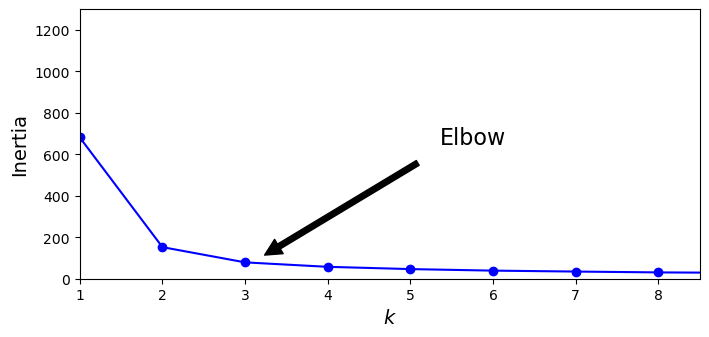

In [10]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
# annotate用法 https://steam.oxxostudio.tw/category/python/example/matplotlib-annotate.html
plt.annotate(
    "Elbow",
    xy=(3, inertias[3]),
    xytext=(0.55, 0.55),
    textcoords="figure fraction",
    fontsize=16,
    arrowprops=dict(facecolor="black", shrink=0.1)
)
plt.axis([1, 8.5, 0, 1300])

使用**Silhouette scores**做評估

In [11]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_list[1:]]

Text(0, 0.5, 'Silhouette score')

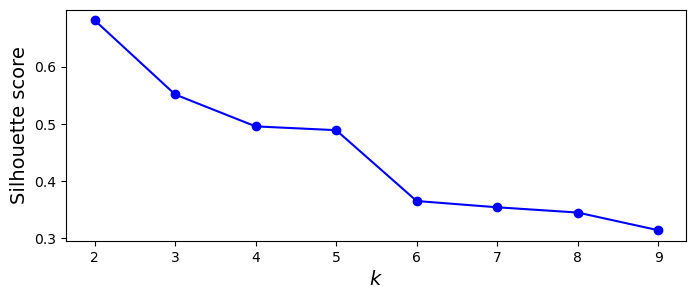

In [12]:
# 繪圖
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)